## Question 1:
Let the events be defined:
- $P$: student pass the class
- $P^c$ : student does not pass the class
- $Q$: student answers question quickly

We want to find $P(P|Q)$. Here, we are given: 

$P(P) = 0.9, P(Q|P) = 0.6, P(Q|P^c) = 0.3$

Then, we know $P(P^c) = 1 - P(P) = 0.1$

Using Law of Total Probability: 

$P(Q) = P(Q|P)P(P) + P(Q|P^c)P(P^c) = 0.6 \cdot 0.9 + 0.3\cdot 0.1 = 0.57$

Then, using Bayes Theorem:
$$P(P|Q) = \frac{P(Q|P)P(P)}{P(Q)} = \frac{0.6 \cdot 0.9 }{0.57} \approx 0.947$$



## Question 2:
1. Likelihood is multinomial: $p(x|\theta, n) = c_{likelihood} \prod_{i=1}^{k}\theta_i^{x_i}$
2. Prior is Dirichlet: $p(\theta| \boldsymbol\alpha) = c_{prior} \prod_{i=1}^{k}\theta_i^{\alpha_i -1}$, where $\boldsymbol\alpha = (\alpha_1, \dots, \alpha_k)$

Using Bayes' Theorem, we know that the posterior is proportional to joint:
$$\begin{align*}
p(\theta|x,n,\boldsymbol\alpha) &\propto p(x|\theta, n)\cdot p(\theta| \boldsymbol\alpha) \\
p(\theta|x,n,\boldsymbol\alpha) &\propto \prod_{i=1}^{k}\theta_i^{x_i}\cdot \prod_{i=1}^{k}\theta_i^{\alpha_i -1}\\
p(\theta|x,n,\boldsymbol\alpha) &\propto  \prod_{i=1}^{k} \theta_i^{x_i + \alpha_i -1}
\end{align*}$$

So, posterior distribution is Dirichlet with parameters:
$$\boldsymbol\alpha^\prime = (\alpha_1 + x_1, \dots, \alpha_k + x_k)$$

## Question 3:

Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

(0.0, 100.0)

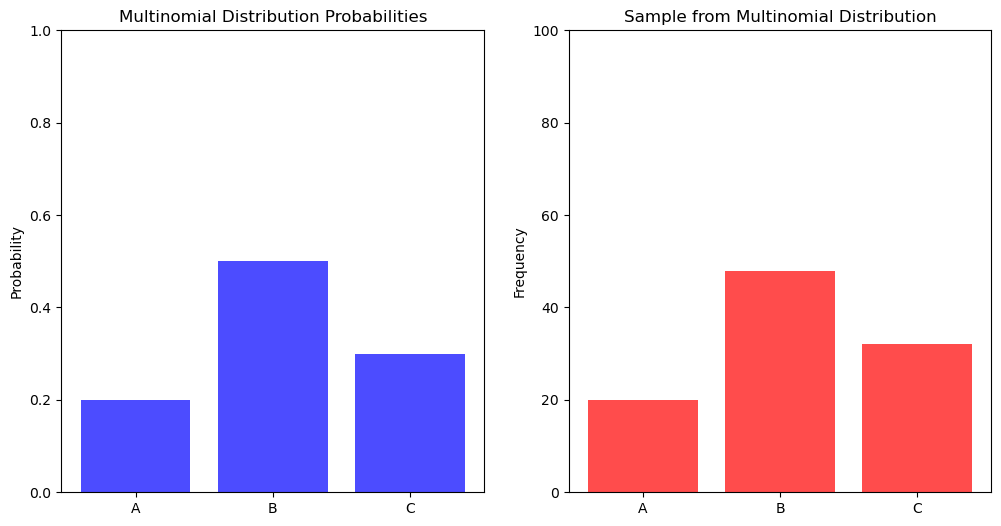

In [9]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Parameters for the multinomial distribution
n_trials = 100  
probabilities = [0.2, 0.5, 0.3] 

# Generate a sample from the multinomial distribution
rv = stats.multinomial(n_trials, probabilities)
sample = rv.rvs(size=1)

# Visualize the multinomial distribution and the sample
categories = ['A', 'B', 'C']

# Plotting the multinomial probabilities
plt.figure(figsize=(12, 6))

# Multinomial probabilities
plt.subplot(1, 2, 1)
plt.bar(categories, probabilities, color='blue', alpha=0.7)
plt.title('Multinomial Distribution Probabilities')
plt.ylabel('Probability')
plt.ylim(0, 1)

# Sample visualization
plt.subplot(1, 2, 2)
plt.bar(categories, sample[0], color='red', alpha=0.7)
plt.title('Sample from Multinomial Distribution')
plt.ylabel('Frequency')
plt.ylim(0, n_trials)

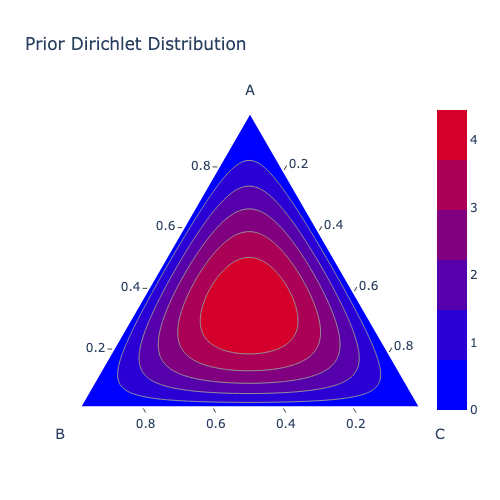

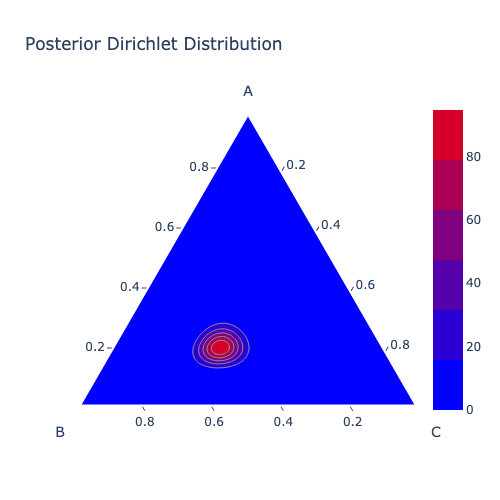

Prior alpha values: [2 2 2]
Sample: [20 48 32]
Posterior alpha values: [22 50 34]


In [12]:
# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]


alpha_prior = np.array([2, 2, 2])  # Prior alpha values
alpha_posterior = (alpha_prior + sample)[0]

# Calculate the densities for the prior and posterior
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Visualize the prior Dirichlet distribution using a ternary plot
fig = ff.create_ternary_contour(p.T, dirichlet_prior_densities,
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian',
                                showscale=True)
fig.update_layout(title='Prior Dirichlet Distribution')
fig.show('png')

# Visualize the posterior Dirichlet distribution using a ternary plot
fig = ff.create_ternary_contour(p.T, dirichlet_posterior_densities,
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian',
                                showscale=True)
fig.update_layout(title='Posterior Dirichlet Distribution')
fig.show('png')

print('Prior alpha values:', alpha_prior)
print('Sample:', sample[0])
print('Posterior alpha values:', alpha_posterior)